# Computer Book A: Chapter 3

-----

Displaying a list of numerical summaries and then plotting a boxplot using `Pandas` and `Seaborn`.

References to API:

- [`seaborn.boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Data wrangling

-----


In [2]:
# define the path to the dataset
path: str = "data/response-inhibition.csv"

# declare the DataFrame
df = pd.read_csv(path)

# replace * with NaN in weight change
df["Weight change"].replace('*', np.nan, inplace=True)

# cast Weight Change from str to float, Group from int to cat
df = df.astype({'Weight change':'float', 'Group': 'category'})

# recode Groups to Treatment, Control
df['Group'].replace({0: 'Control', 1: 'Treatment'}, inplace=True)

# Select Groups, Weight Change, and then Groupby
df_grouped = df[['Group', 'Weight change']].groupby("Group")

# Describing the Data

-----


In [3]:
# declare a variable
stats = df_grouped.describe()

# declare the quartiles
q3 = df_grouped['Weight change'].quantile(0.75)
q1 = df_grouped['Weight change'].quantile(0.25)

'''----------------------------------------------------------------------------
# add the grouped column.
# Declaring 'Weight change' adds 'IQR' to the Weight change group
----------------------------------------------------------------------------'''

stats['Weight change', 'IQR'] = q3 - q1

# display stats
stats

Weight change                                                  
                  count      mean      std  min  25%   50%  75%  max  IQR
Group                                                                    
Control            41.0  0.170732  1.20130 -3.2 -0.7  0.10  1.0  2.7  1.7
Treatment          40.0 -0.670000  1.70823 -7.0 -1.5 -0.55  0.2  3.6  1.7

## Plot the data

-----


[Text(0.5, 0, 'Weight change'),
 Text(0.5, 1.0, 'Weight Change of Groups by Percentage')]

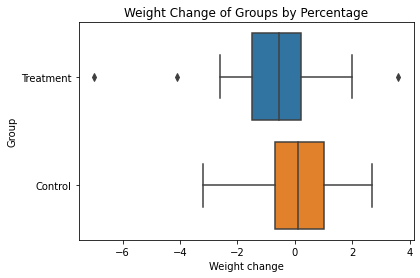

In [4]:
# default boxplot
ax1 = sns.boxplot(x=df['Weight change'],
                  y=df['Group'])

ax1.set(xlabel="Weight change",
        title="Weight Change of Groups by Percentage")